In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as non_clustered_plt
import matplotlib.pyplot as kmeans_error_plt
import matplotlib.pyplot as kmeans_clustered_plt
import matplotlib.pyplot as hierarchical_dendrogram_plt
import matplotlib.pyplot as hierarchical_clustered_plt
import matplotlib.pyplot as dbscan_eps_plt
import matplotlib.pyplot as clustered_plt

In [2]:
# Importing Data
df = pd.read_csv('data.csv')

In [3]:
# Data
df.head()

,0,1
0,484.891555,-31.006357
1,489.391178,21.973916
2,462.886575,-27.599889
3,517.218479,5.588090
4,455.669049,1.982181


In [4]:
# Data Shape
df.shape

(2300, 2)

In [5]:
# Data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2300 entries, 0 to 2299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2300 non-null   float64
 1   1       2300 non-null   float64
dtypes: float64(2)
memory usage: 36.1 KB


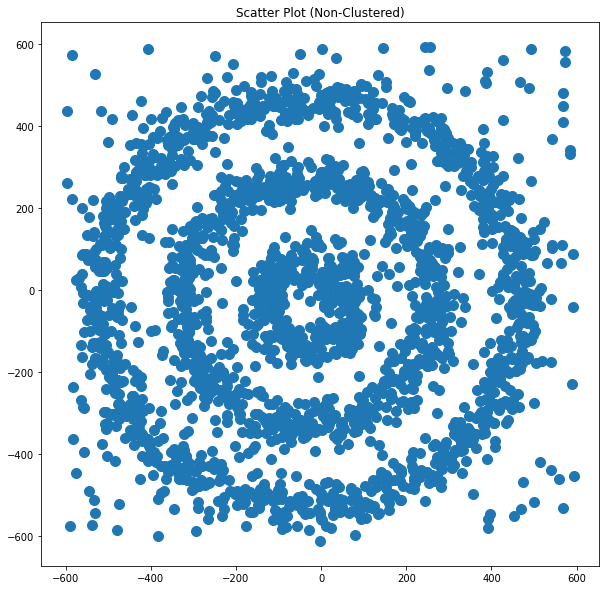

In [6]:
# Plotting Data
non_clustered_plt.figure(figsize=(10, 10))
non_clustered_plt.scatter(df.iloc[:, 0], df.iloc[:, 1], s=100)
non_clustered_plt.title('Scatter Plot (Non-Clustered)')
non_clustered_plt.show()

In [7]:
# K-Means Clustering
wcss = []
n = 21
for i in range(1, n):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

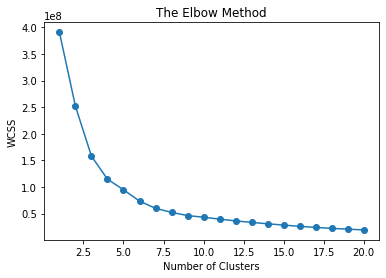

In [8]:
# Error Plot
kmeans_error_plt.scatter(range(1, n), wcss)
kmeans_error_plt.plot(range(1, n), wcss)
kmeans_error_plt.xlabel('Number of Clusters')
kmeans_error_plt.ylabel('WCSS')
kmeans_error_plt.title('The Elbow Method')
kmeans_error_plt.show()

In [9]:
# K-Means with Correct Number of Clusters
kmeans = KMeans(n_clusters=4, init='k-means++')
y_kmeans = kmeans.fit_predict(df)

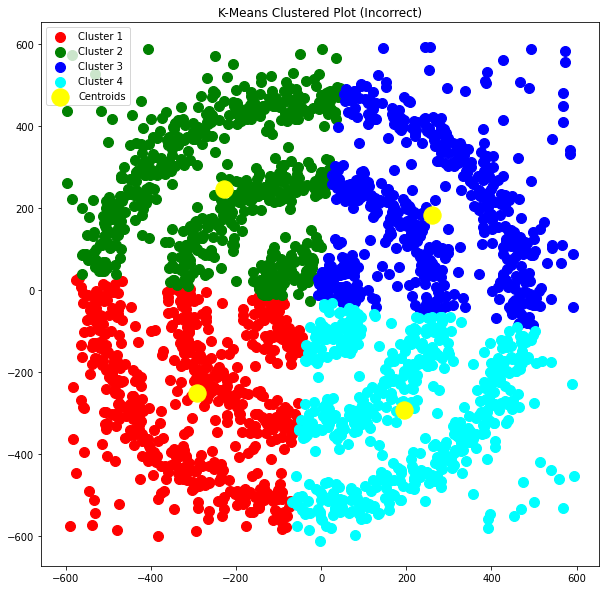

In [10]:
# K-Means Clustered Result
kmeans_clustered_plt.figure(figsize=(10, 10))
kmeans_clustered_plt.scatter(df.iloc[y_kmeans==0, 0], df.iloc[y_kmeans==0, 1], s=100, c='red', label='Cluster 1')
kmeans_clustered_plt.scatter(df.iloc[y_kmeans==1, 0], df.iloc[y_kmeans==1, 1], s=100, c='green', label='Cluster 2')
kmeans_clustered_plt.scatter(df.iloc[y_kmeans==2, 0], df.iloc[y_kmeans==2, 1], s=100, c='blue', label='Cluster 3')
kmeans_clustered_plt.scatter(df.iloc[y_kmeans==3, 0], df.iloc[y_kmeans==3, 1], s=100, c='cyan', label='Cluster 4')
kmeans_clustered_plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
kmeans_clustered_plt.title('K-Means Clustered Plot (Incorrect)')
kmeans_clustered_plt.legend()
kmeans_clustered_plt.show()

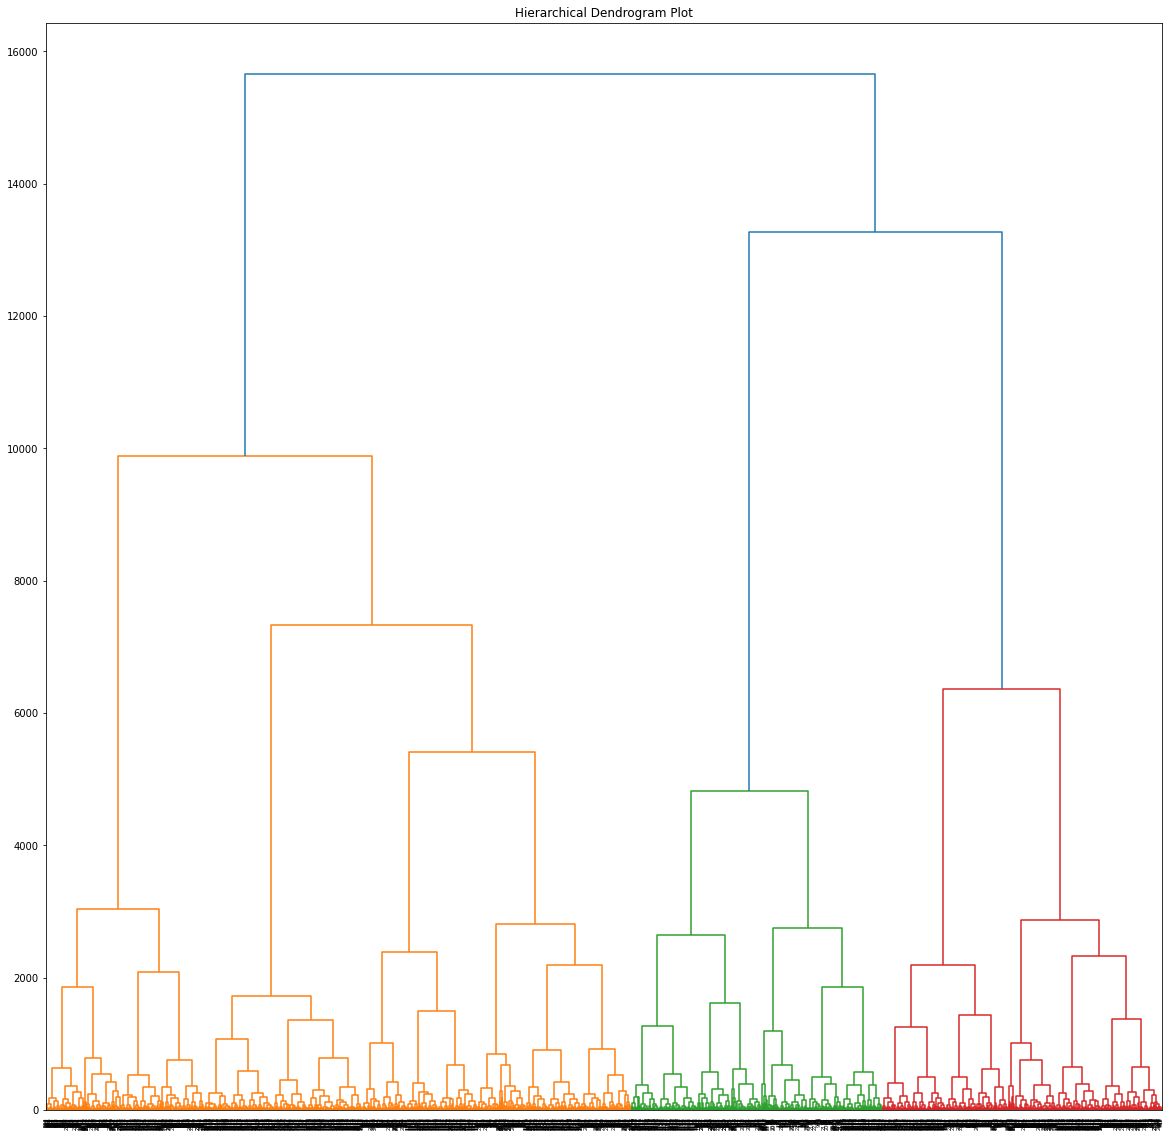

In [11]:
# Dendrogram Plot
hierarchical_dendrogram_plt.figure(figsize=(20, 20))
dendrogram = sch.dendrogram(sch.linkage(df, method='ward'))
hierarchical_dendrogram_plt.title('Hierarchical Dendrogram Plot')
hierarchical_dendrogram_plt.show()

In [12]:
# Hierarchical Clustering
hierarchy = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
y_hierarchy = hierarchy.fit_predict(df)

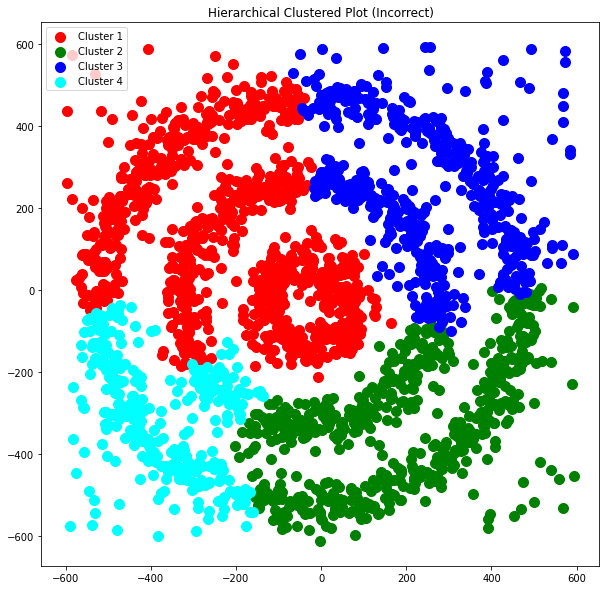

In [13]:
# Hierarchical Clustered Result
hierarchical_clustered_plt.figure(figsize=(10, 10))
hierarchical_clustered_plt.scatter(df.iloc[y_hierarchy==0, 0], df.iloc[y_hierarchy==0, 1], s=100, c='red', label='Cluster 1')
hierarchical_clustered_plt.scatter(df.iloc[y_hierarchy==1, 0], df.iloc[y_hierarchy==1, 1], s=100, c='green', label='Cluster 2')
hierarchical_clustered_plt.scatter(df.iloc[y_hierarchy==2, 0], df.iloc[y_hierarchy==2, 1], s=100, c='blue', label='Cluster 3')
hierarchical_clustered_plt.scatter(df.iloc[y_hierarchy==3, 0], df.iloc[y_hierarchy==3, 1], s=100, c='cyan', label='Cluster 4')
hierarchical_clustered_plt.title('Hierarchical Clustered Plot (Incorrect)')
hierarchical_clustered_plt.legend()
hierarchical_clustered_plt.show()

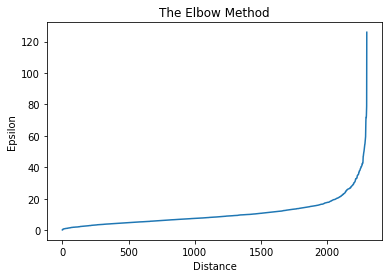

In [14]:
# Epsilon Plot
neighbors = NearestNeighbors(n_neighbors=5)
neighbors.fit(df)
distances, indices = neighbors.kneighbors(df)
dbscan_eps_plt.plot(np.sort(distances, axis=0)[:, 1])
dbscan_eps_plt.xlabel('Distance')
dbscan_eps_plt.ylabel('Epsilon')
dbscan_eps_plt.title('The Elbow Method')
dbscan_eps_plt.show()

In [15]:
# DBSCAN
dbscan = DBSCAN(eps=30, min_samples=6, metric='euclidean', n_jobs=-1)
y_dbscan = dbscan.fit_predict(df)

In [16]:
# Clusters
set(list(dbscan.labels_))

{-1, 0, 1, 2}

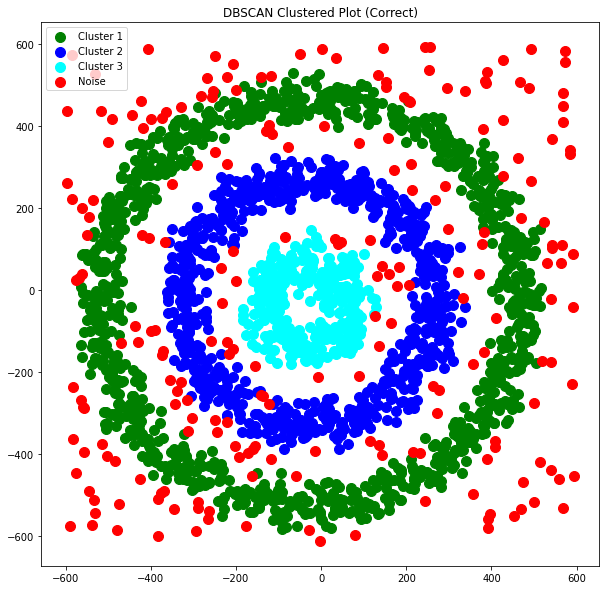

In [17]:
# DBSCAN Clustered Result
clustered_plt.figure(figsize=(10, 10))
clustered_plt.scatter(df.iloc[y_dbscan==0, 0], df.iloc[y_dbscan==0, 1], s=100, c='green', label='Cluster 1')
clustered_plt.scatter(df.iloc[y_dbscan==1, 0], df.iloc[y_dbscan==1, 1], s=100, c='blue', label='Cluster 2')
clustered_plt.scatter(df.iloc[y_dbscan==2, 0], df.iloc[y_dbscan==2, 1], s=100, c='cyan', label='Cluster 3')
clustered_plt.scatter(df.iloc[y_dbscan==-1, 0], df.iloc[y_dbscan==-1, 1], s=100, c='red', label='Noise')
clustered_plt.title('DBSCAN Clustered Plot (Correct)')
clustered_plt.legend()
clustered_plt.show()